# Assignment 1, DIT406

Time spent on this project

Carl Kindberg: 12 hours

In [1]:
# Used packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats

In [2]:
# Loading data
gdp_data_cap = pd.read_csv(r'C:\Users\kindb\Downloads\data_dat405\gdp-per-capita-in-us-dollar-world-bank.csv')
gdp_data = pd.read_csv(r'C:\Users\kindb\Downloads\data_dat405\gross-domestic-product.csv')
life_data = pd.read_csv(r'C:\Users\kindb\Downloads\data_dat405\life-expectancy.csv')

In [3]:
# Filter out all data corresponding to 2019.

gdp_cap_2019 = gdp_data_cap[gdp_data_cap['Year']==2019]
gdp_2019 = gdp_data[gdp_data['Year']==2019]
life_2019 = life_data[life_data['Year']==2019]


In [4]:
gdp_cap_2019=gdp_cap_2019.drop(columns = ['Entity', 'Year'])
gdp_cap_2019

,Code,GDP per capita (constant 2010 US$)
17,AFG,573.287506
78,NaN,1598.376982
139,NaN,1789.467908
180,ALB,5207.305322
241,DZA,4701.279743
...,...,...
11846,VUT,2865.787495
11938,VNM,2082.243651
11999,OWID_WRL,11072.854662
12089,ZMB,1653.829030


In [5]:
gdp_2019 = gdp_2019.drop(columns = ['Entity', 'Year'])
gdp_2019

,Code,GDP (constant 2010 US$)
17,AFG,2.180886e+10
78,NaN,1.055003e+12
139,NaN,7.997340e+11
180,ALB,1.486264e+10
241,DZA,2.024045e+11
...,...,...
11849,VUT,8.593981e+08
11941,VNM,2.008576e+11
12002,OWID_WRL,8.496584e+13
12092,ZMB,2.953910e+10


In [6]:
life_2019 = life_2019.drop(columns = ['Entity', 'Year'])
life_2019

,Code,Life expectancy
69,AFG,64.833
141,NaN,63.170
211,ALB,78.573
284,DZA,76.880
354,ASM,73.745
...,...,...
18740,ESH,70.263
18817,OWID_WRL,72.584
18887,YEM,66.125
18957,ZMB,63.886


In [7]:
print("Total missing gdp per capita values 2019:", gdp_cap_2019.iloc[:,1].isnull().sum())
print("Total missing gdp values 2019:", gdp_cap_2019.iloc[:,1].isnull().sum())
print("Total missing life expectancy values 2019:", life_2019.iloc[:,1].isnull().sum())


Total missing gdp per capita values 2019: 0
Total missing gdp values 2019: 0
Total missing life expectancy values 2019: 0


In [8]:
merged_2019 = pd.merge(gdp_cap_2019, gdp_2019, how='inner', on='Code').dropna().sort_values('GDP per capita (constant 2010 US$)');

Data = pd.merge(merged_2019, life_2019, how='inner', on='Code').dropna().sort_values('Life expectancy');

In [9]:
Data

,Code,GDP per capita (constant 2010 US$),GDP (constant 2010 US$),Life expectancy
1,CAF,384.256968,1.823368e+09,53.283
14,TCD,813.719589,1.297629e+10,54.239
27,LSO,1233.039963,2.620539e+09,54.331
51,NGA,2374.369383,4.771618e+11,54.687
3,SLE,488.885985,3.819767e+09,54.696
...,...,...,...,...
181,MAC,56506.263308,3.618921e+10,84.244
173,JPN,49000.256040,6.187014e+12,84.629
165,HKG,37762.739863,2.835000e+11,84.857
176,SMR,50894.292233,1.723484e+09,84.972


In [10]:
# Define variables x1, x2 x3 for easier access to GDP per capita, GDP and Life expectancy. 
x1 = Data['GDP per capita (constant 2010 US$)']
x2 = Data['GDP (constant 2010 US$)']
x3 = Data['Life expectancy']

## 1. a)
#### Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [1p]

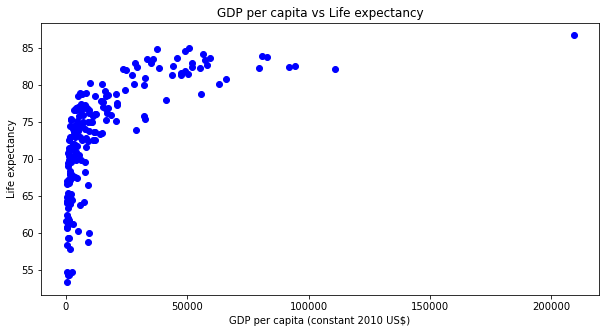

In [11]:
plt.scatter(x1, x3,color = 'b')
plt.gcf().set_size_inches(10, 5)
plt.title('GDP per capita vs Life expectancy')
plt.xlabel('GDP per capita (constant 2010 US$)')
plt.ylabel('Life expectancy')
plt.show()


First of all I have choosen to only investigate 2019, one could have choosen another year to compare the results. In that way we could have seen which countrys that have improved (or hopefully not worsen) Life expectancy and GDP per capita.

The year 2019 was choose since I couldn't find any data on Life expectations from 2020 i.e i didnt want to compare GDP per capita 2020 vs Life expectancy 2019 so so I choose to only focus on 2019.

Note from the scatter plot above the results doesnt seem to be linear. Maybe one could use a transformation to get nicer results. 
Note also that there is a outlier in the right upper corner, one might experiment with removing this observation as it might be a influential point.

 

## 1. b) 
#### Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained. [1p]

In [12]:
print("Spearmans correlation coefficient =", scipy.stats.spearmanr(x1, x3)[0])

Spearmans correlation coefficient = 0.8554173451523056


By inspecting the scatter plot above we can see that high GDP per capita indicates high Life expectancy. This seems reasonable as GDP per capita is a measure of a countrys wealth.

Spearmans correlation indicates a highliy positive correlation GDP per capita and Life expectancy (about 85% correlation between the variables). 

#### What does this mean?
This means if you were born in a country with low GDP per capita you have lower life expectancy respectively if you were born in a country with high GDP per capita your life expectancy will be higher.
 
Countrys with high wealth (GDP per capita) means in genral a lower rate of poverty, easier access to necessities like clean water, food, healthcare and medicines etc. 

Starvation only exists in poverty and there is probably next to zero starvation in a wealthy contry. Since starvation is a problem for adults as well as children, this reduces the life expectancy in the poor countries.

## 1. c) 
#### Did you do any data cleaning (e.g., by removing entries that you think are not useful) for the task of drawing scatter plot(s) and the task of answering the questions d, e, f, and g? If so, explain what kind of entries that you chose to remove and why. [0.5p]




#### Data cleaning:
1. Only countrys that have data for both GDP per capita and Life expectations is included.
2. Africa Eastern and Southern + Africa Western and Central is excluded this is a continent and not a country.
3. Removed all Countries that have missing values for either GDP per capita or Life expectancy.
4. Dropped the column Year as we only use data from 2019.
5. Dropped the column Entity as the column Code gives the same information.

## 1. d)
Which countries have a life expectancy higher than one standard deviation 
above the mean? [0.5p]

In [13]:
# First of all we can define a zscore function.

def zscore(i):
    return ((i-np.mean(i))/np.std(i))

In [14]:
# let's calculate mean and std for life expectancy
print("Mean for Life expectancy:", np.mean(x3))
print("Standard deviation for Life expectancy:", np.std(x3))

Mean for Life expectancy: 73.15636082474228
Standard deviation for Life expectancy: 7.48032441573565


In [15]:
print(zscore(x3))

1     -2.656751
14    -2.528949
27    -2.516650
51    -2.469059
3     -2.467856
         ...   
181    1.482240
173    1.533709
165    1.564189
176    1.579562
193    1.817386
Name: Life expectancy, Length: 194, dtype: float64


In [16]:
filter_std_1_life = (zscore(x3)) > 1

In [17]:
# Add a row where true corresponds to greter than 1 std above the mean and false corresponds to less than one std from the mean.
Data['Std filter (1)']= filter_std_1_life

In [18]:
Data

,Code,GDP per capita (constant 2010 US$),GDP (constant 2010 US$),Life expectancy,Std filter (1)
1,CAF,384.256968,1.823368e+09,53.283,False
14,TCD,813.719589,1.297629e+10,54.239,False
27,LSO,1233.039963,2.620539e+09,54.331,False
51,NGA,2374.369383,4.771618e+11,54.687,False
3,SLE,488.885985,3.819767e+09,54.696,False
...,...,...,...,...,...
181,MAC,56506.263308,3.618921e+10,84.244,True
173,JPN,49000.256040,6.187014e+12,84.629,True
165,HKG,37762.739863,2.835000e+11,84.857,True
176,SMR,50894.292233,1.723484e+09,84.972,True


In [19]:
std_gt_1 = Data[Data['Std filter (1)']]
std_gt_1

,Code,GDP per capita (constant 2010 US$),GDP (constant 2010 US$),Life expectancy,Std filter (1)
186,DNK,65867.001720,3.829785e+11,80.898,True
160,CYP,32517.237276,2.867864e+10,80.982,True
168,GBR,43592.414518,2.913557e+12,81.321,True
153,SVN,27421.028712,5.726567e+10,81.324,True
171,DEU,47469.477084,3.944379e+12,81.326,True
175,AUT,50536.664146,4.487615e+11,81.544,True
172,BEL,47611.913704,5.470123e+11,81.628,True
174,FIN,49310.457064,2.722729e+11,81.908,True
152,PRT,24679.034094,2.538550e+11,82.049,True
150,GRC,23503.579804,2.519956e+11,82.239,True


In [20]:
print("Total number of countrys one standard deviation or more from the mean:", sum(Data['Std filter (1)']))

Total number of countrys one standard deviation or more from the mean: 35


In [21]:
print(np.min(Data[Data['Std filter (1)'] == False]))
print(np.max(Data[Data['Std filter (1)'] == False]))

Code                                          AFG
GDP per capita (constant 2010 US$)        208.075
GDP (constant 2010 US$)               4.59243e+07
Life expectancy                            53.283
Std filter (1)                              False
dtype: object
Code                                          ZWE
GDP per capita (constant 2010 US$)        63281.6
GDP (constant 2010 US$)               8.49658e+13
Life expectancy                            80.279
Std filter (1)                              False
dtype: object


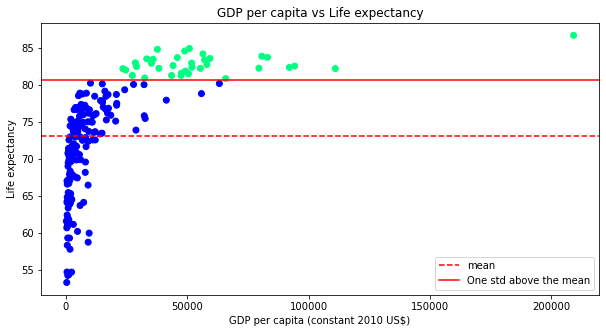

In [22]:
plt.gcf().set_size_inches(10, 5)
plt.scatter(x1, x3, c=Data['Std filter (1)'], cmap='winter')

plt.axhline(y = np.mean(x3), color = 'r', linestyle = 'dashed')

plt.axhline(y= np.mean(x3)+np.std(x3), color = 'r')
plt.legend(("mean", "One std above the mean"))

plt.title('GDP per capita vs Life expectancy')
plt.xlabel('GDP per capita (constant 2010 US$)')
plt.ylabel('Life expectancy')

plt.show()

From the plot above we the green dots corresponds to observations greater than mean + 1 std deviation above the mean.
There is a total of 35 countries that fulfills these requirement.

Note that all of these countries with high Life expectancy also have relative high GDP per capita also.

## 1. e)
#### Which countries have high life expectancy but have low GDP? [0.5p]

In [23]:
# Let's do the exact same calculations except taking the mean minus 1 std from the GDP
zscore(x2) < -1

1      False
14     False
27     False
51     False
3      False
       ...  
181    False
173    False
165    False
176    False
193    False
Name: GDP (constant 2010 US$), Length: 194, dtype: bool

In [24]:
print("Total countries more than 1 (only negative) std away from the mean of GDP:", np.sum(x2.lt(-1)))

Total countries more than 1 (only negative) std away from the mean of GDP: 0


Since there isn't any country that fulfills the requirement mean - 1 std we must try another method.

Let's try use the first quartile instead, then we know that we have at least some observations.

In [25]:
# calculates the GDP for the first quartile
gdp_low = np.percentile(x2, 25)
print(gdp_low)

9915307070.743034


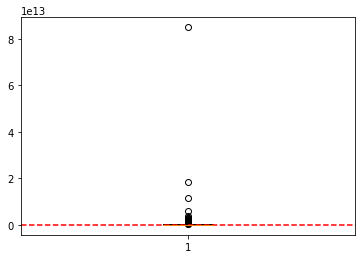

In [26]:
# Boxplot of first quartile of GDP
plt.plot()
plt.boxplot(x2)
plt.axhline(y=gdp_low, color = 'r', linestyle = 'dashed')
plt.show()

In [27]:
# Computes filter for low gdp and high life expectancy using quartile for GDP and mean + 1 std for high life expectancy.
filter_gdp_low = x2 < gdp_low
filter_life_high = zscore(x3) > 1

In [28]:
# add columns to the data
Data['Low GDP'] = filter_gdp_low
Data['High life exp'] = filter_life_high

In [29]:
Data

,Code,GDP per capita (constant 2010 US$),GDP (constant 2010 US$),Life expectancy,Std filter (1),Low GDP,High life exp
1,CAF,384.256968,1.823368e+09,53.283,False,True,False
14,TCD,813.719589,1.297629e+10,54.239,False,False,False
27,LSO,1233.039963,2.620539e+09,54.331,False,True,False
51,NGA,2374.369383,4.771618e+11,54.687,False,False,False
3,SLE,488.885985,3.819767e+09,54.696,False,True,False
...,...,...,...,...,...,...,...
181,MAC,56506.263308,3.618921e+10,84.244,True,False,True
173,JPN,49000.256040,6.187014e+12,84.629,True,False,True
165,HKG,37762.739863,2.835000e+11,84.857,True,False,True
176,SMR,50894.292233,1.723484e+09,84.972,True,True,True


In [30]:
low_gdp = Data[filter_gdp_low] # First we filter out all countrys with low GDP.
low_gdp_high_life = low_gdp.loc[filter_life_high] # Then we filter out low GDP and high life expectancy.

In [31]:
low_gdp_high_life # These 5 countrys has low GDP and high life expetancy.

,Code,GDP per capita (constant 2010 US$),GDP (constant 2010 US$),Life expectancy,Std filter (1),Low GDP,High life exp
191,BMU,94274.216381,6.025348e+09,82.593,True,True,True
170,AND,45959.848264,3.545618e+09,83.732,True,True,True
188,CYM,80755.963948,5.244938e+09,83.924,True,True,True
176,SMR,50894.292233,1.723484e+09,84.972,True,True,True
193,MCO,209224.505501,8.152851e+09,86.751,True,True,True


In [32]:
print("Total number of countrys with low GDP but still high life expectancy:", sum(low_gdp_high_life['Low GDP']))

Total number of countrys with low GDP but still high life expectancy: 5


#### These are the five countries with High life expectation but low GDP:
BMU = Bermuda

AND = Andorra

CYM = Cayman islands

SMR = San Marino

MCO = Monaco

Note that all of these countries are very small in numbers of poulation. 


## 1. f)
#### Does every strong economy (normally indicated by GDP) have high life expectancy? [1p]

In [33]:
filter_low_life_exp =(zscore(x3)) < -1

In [34]:
Data['Low life exp'] = filter_low_life_exp

In [35]:
high_gdp = Data[filter_std_1_life] # First we filter out all countrys with high GDP.
high_gdp_low_life = high_gdp.loc[filter_low_life_exp] # Then we filter out high GDP but low Life expectancy.

In [36]:
high_gdp_low_life

,Code,GDP per capita (constant 2010 US$),GDP (constant 2010 US$),Life expectancy,Std filter (1),Low GDP,High life exp,Low life exp


So to answer the question if there is any country with strong economy but low life expectancy the answers seems to be no. In next question I will try to answer this question deeper.

## 1. g) 
#### Related to question f, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of g and f. [1p]

In [37]:
zscore(x1) < -1

1      False
14     False
27     False
51     False
3      False
       ...  
181    False
173    False
165    False
176    False
193    False
Name: GDP per capita (constant 2010 US$), Length: 194, dtype: bool

In [38]:
# same problem as with using GDP ... We get no observations that fullfills these requirement.
print("Total countries more than 1 (only negative) std away from the mean of GDP per capita:", np.sum(x1.lt(-1)))

Total countries more than 1 (only negative) std away from the mean of GDP per capita: 0


In [39]:
gdp_low_cap = np.percentile(x1, 25)
print(gdp_low_cap)

2175.27458439583


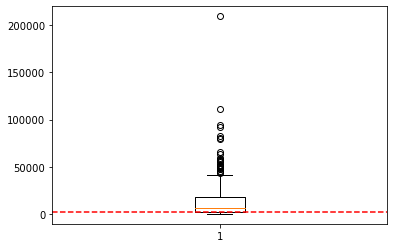

In [40]:
plt.plot()
plt.boxplot(x1)
plt.axhline(y=gdp_low_cap, color = 'r', linestyle = 'dashed')
plt.show()

In [41]:
filter_gdp_low_cap = x1 < gdp_low_cap

In [42]:
Data['Low GDP per capita'] = filter_gdp_low_cap

In [43]:
Data

,Code,GDP per capita (constant 2010 US$),GDP (constant 2010 US$),Life expectancy,Std filter (1),Low GDP,High life exp,Low life exp,Low GDP per capita
1,CAF,384.256968,1.823368e+09,53.283,False,True,False,True,True
14,TCD,813.719589,1.297629e+10,54.239,False,False,False,True,True
27,LSO,1233.039963,2.620539e+09,54.331,False,True,False,True,True
51,NGA,2374.369383,4.771618e+11,54.687,False,False,False,True,False
3,SLE,488.885985,3.819767e+09,54.696,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...
181,MAC,56506.263308,3.618921e+10,84.244,True,False,True,False,False
173,JPN,49000.256040,6.187014e+12,84.629,True,False,True,False,False
165,HKG,37762.739863,2.835000e+11,84.857,True,False,True,False,False
176,SMR,50894.292233,1.723484e+09,84.972,True,True,True,False,False


In [44]:
low_gdp_cap = Data[filter_gdp_low_cap] # First we filter out all countrys with low GDP.
low_gdp_cap_high_life = low_gdp_cap.loc[filter_life_high] # Then we filter out low GDP and high life expectancy.

In [45]:
low_gdp_cap_high_life

,Code,GDP per capita (constant 2010 US$),GDP (constant 2010 US$),Life expectancy,Std filter (1),Low GDP,High life exp,Low life exp,Low GDP per capita


As we can se above there is no observations that has a high life expectation but low GDP per capita.

Instead we can choose to change the percentile to 80 just for fun to get some observations:

In [46]:
gdp_low_cap_80 = np.percentile(x1, 80)
filter_gdp_low_cap_80 = x1 < gdp_low_cap_80
Data['Low GDP per capita (80)'] = filter_gdp_low_cap_80

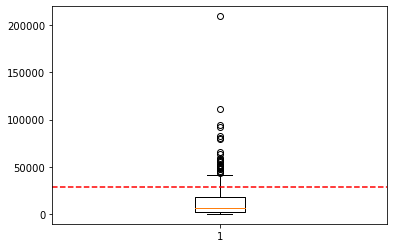

In [47]:
plt.plot()
plt.boxplot(x1)
plt.axhline(y=gdp_low_cap_80, color = 'r', linestyle = 'dashed')
plt.show()

In [48]:
low_gdp_cap_80 = Data[filter_gdp_low_cap_80] # First we filter out all countrys with low GDP.
low_gdp_cap_high_life_80 = low_gdp_cap_80.loc[filter_life_high] # Then we filter out low GDP and high life expectancy.
low_gdp_cap_high_life_80

,Code,GDP per capita (constant 2010 US$),GDP (constant 2010 US$),Life expectancy,Std filter (1),Low GDP,High life exp,Low life exp,Low GDP per capita,Low GDP per capita (80)
153,SVN,27421.028712,5.726567e+10,81.324,True,False,True,False,False,True
152,PRT,24679.034094,2.538550e+11,82.049,True,False,True,False,False,True
150,GRC,23503.579804,2.519956e+11,82.239,True,False,True,False,False,True


This results in 3 observations. These 3 observations is the ones with high life expectacny but still low GDP per capita.

SVN = Slovenia

PRT = Portugal

GRC = Greece


In [49]:
print("Spearmans correlation coefficient for Life expectancy vs GDP per capita =", scipy.stats.spearmanr(x1, x3)[0])

print("Spearmans correlation coefficient for Life expectancy vs GDP =", scipy.stats.spearmanr(x2, x3)[0])

Spearmans correlation coefficient for Life expectancy vs GDP per capita = 0.8554173451523056
Spearmans correlation coefficient for Life expectancy vs GDP = 0.4267065067639362


When we use GDP as a measure we only got small countries (population size)


Instead when we try to filter out GDP per capita and high Life expectancy at the same time we don't get any observations.

This makes sense as there is a 85.55% correlation between GDP per capita and Life expectancy whereas "only" 42.67% correlation between Life expectancy vs GDP. This shows that a low GDP per capita dramatically decrease the Life expectancy of the population. But it also shows that only GDP isn't a great measure for measuring a countries wealth with respsect to population.

In this case one should probably use GDP per capita as a measure of a countries wealth over GDP.

Why?

Because GDP per capita takes into account the total population of a country.


Below is a plot comparing the two measures.

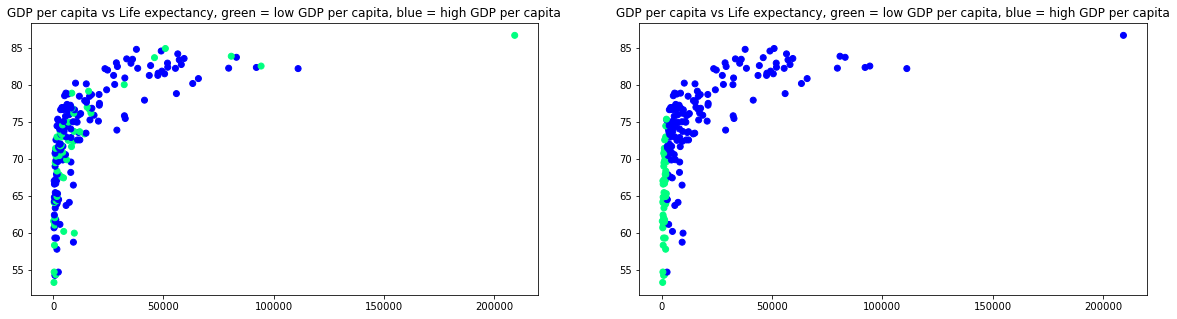

In [50]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.scatter(x1, x3, c=Data['Low GDP'], cmap='winter')
ax1.set_title('GDP per capita vs Life expectancy, green = low GDP per capita, blue = high GDP per capita')

ax2.scatter(x1, x3, c=Data['Low GDP per capita'], cmap='winter')
ax2.set_title('GDP per capita vs Life expectancy, green = low GDP per capita, blue = high GDP per capita')




plt.gcf().set_size_inches(20, 5)
plt.show()

From the scatter plots above it is pretty clear that GDP per capita is a much better measure. In the left scatter we can see that both the outlier in the right upper corner is marked green meaning that it has a low GDP but it is also the country with highest expected life length. In the right scatter were GDP per capita is used instead we can see that this is marked as blue intstead meaning that it is a wealthy (high GDP compared to it's population) country.


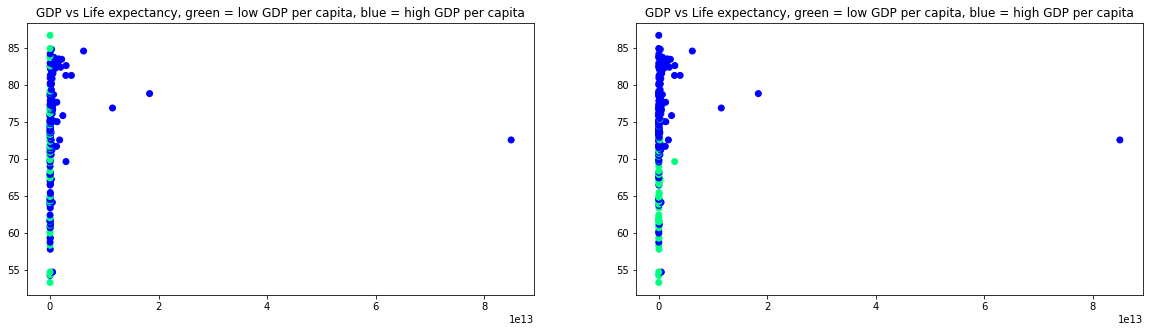

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.scatter(x2, x3, c=Data['Low GDP'], cmap='winter')

ax2.scatter(x2, x3, c=Data['Low GDP per capita'], cmap='winter')

ax1.set_title('GDP vs Life expectancy, green = low GDP per capita, blue = high GDP per capita')
ax2.set_title('GDP vs Life expectancy, green = low GDP per capita, blue = high GDP per capita')

plt.gcf().set_size_inches(20, 5)
plt.show()

## 2. a)

#### Think of several meaningful questions that can be answered with these data, make several informative visualisations to answer those questions. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [2.5p]

In [52]:
# Loads 3 different new datasets
happiness = pd.read_csv(r'C:\Users\kindb\Downloads\data_dat405\happiness-cantril-ladder.csv')

child_mortality = pd.read_csv(r'C:\Users\kindb\Downloads\data_dat405\child-mortality-igme.csv')

mental_substance_disorder = pd.read_csv(r'C:\Users\kindb\Downloads\data_dat405\share-with-mental-and-substance-disorders.csv')

internet = pd.read_csv(r'C:\Users\kindb\Downloads\data_dat405\share-of-individuals-using-the-internet.csv')

In [53]:
# Delete the columnn for Entity as Code gives the same information...
happiness = happiness.drop(columns = ['Entity'])

child_mortality = child_mortality.drop(columns = ['Entity'])

mental_substance_disorder = mental_substance_disorder.drop(columns = ['Entity'])

#### I choosed to filter out 4 different countries: Sweden,  USA, Greece and Slovenia. 

In [54]:
# FILTERING OUT SWEDEN

happiness_SWE = happiness[(happiness['Code'] == 'SWE') 
                          & (happiness['Year'] <= 2016)
                         & (happiness['Year'] >= 2007)]

child_mortality_SWE = child_mortality[(child_mortality['Code'] == 'SWE') & 
                                      (child_mortality['Year'] >= 2007) & 
                                      (child_mortality['Year'] <= 2016)]

mental_substance_disorder_SWE = mental_substance_disorder[(mental_substance_disorder['Code'] == 'SWE') 
                                                          & (mental_substance_disorder['Year'] >= 2007)]

gdp_data_cap_SWE = gdp_data_cap[(gdp_data_cap['Code'] == 'SWE') 
                                & (gdp_data_cap['Year'] <= 2016) 
                               & (gdp_data_cap['Year'] >= 2007)]



In [55]:
# FILTERING OUT USA

happiness_USA = happiness[(happiness['Code'] == 'USA') 
                          & (happiness['Year'] <= 2016)
                         & (happiness['Year'] >= 2007)]

child_mortality_USA = child_mortality[(child_mortality['Code'] == 'USA') & 
                                      (child_mortality['Year'] >= 2007) & 
                                      (child_mortality['Year'] <= 2016)]

mental_substance_disorder_USA = mental_substance_disorder[(mental_substance_disorder['Code'] == 'USA') 
                                                          & (mental_substance_disorder['Year'] >= 2007)
                                                         & (mental_substance_disorder['Year'] <= 2007)]

gdp_data_cap_USA = gdp_data_cap[(gdp_data_cap['Code'] == 'USA') 
                                & (gdp_data_cap['Year'] <= 2016) 
                               & (gdp_data_cap['Year'] >= 2007)]

In [56]:
# FILTERING OUT GREECE

happiness_GRC = happiness[(happiness['Code'] == 'GRC') 
                          & (happiness['Year'] <= 2016)
                         & (happiness['Year'] >= 2007)]

child_mortality_GRC = child_mortality[(child_mortality['Code'] == 'GRC') & 
                                      (child_mortality['Year'] >= 2007) & 
                                      (child_mortality['Year'] <= 2016)]

mental_substance_disorder_GRC = mental_substance_disorder[(mental_substance_disorder['Code'] == 'GRC') 
                                                          & (mental_substance_disorder['Year'] >= 2007)]

gdp_data_cap_GRC = gdp_data_cap[(gdp_data_cap['Code'] == 'GRC') 
                                & (gdp_data_cap['Year'] <= 2016) 
                               & (gdp_data_cap['Year'] >= 2007)]

In [57]:
# FILTERING OUT ZWE

happiness_ZWE = happiness[(happiness['Code'] == 'ZWE') 
                          & (happiness['Year'] <= 2016)
                         & (happiness['Year'] >= 2007)]

child_mortality_ZWE = child_mortality[(child_mortality['Code'] == 'ZWE') & 
                                      (child_mortality['Year'] >= 2007) & 
                                      (child_mortality['Year'] <= 2016)]

mental_substance_disorder_ZWE = mental_substance_disorder[(mental_substance_disorder['Code'] == 'ZWE') 
                                                          & (mental_substance_disorder['Year'] >= 2007)]

gdp_data_cap_ZWE = gdp_data_cap[(gdp_data_cap['Code'] == 'ZWE') 
                                & (gdp_data_cap['Year'] <= 2016) 
                               & (gdp_data_cap['Year'] >= 2007)]

In [58]:
internet_SWE = internet[(internet['Code'] == 'SWE') &
                       (internet['Year'] >= 2007) &
                       (internet['Year'] <= 2016)]

internet_USA = internet[(internet['Code'] == 'USA') &
                       (internet['Year'] >= 2007) &
                       (internet['Year'] <= 2016)]

internet_GRC = internet[(internet['Code'] == 'GRC') &
                       (internet['Year'] >= 2007) &
                       (internet['Year'] <= 2016)]

internet_ZWE = internet[(internet['Code'] == 'ZWE') &
                       (internet['Year'] >= 2007) &
                       (internet['Year'] <= 2016)]

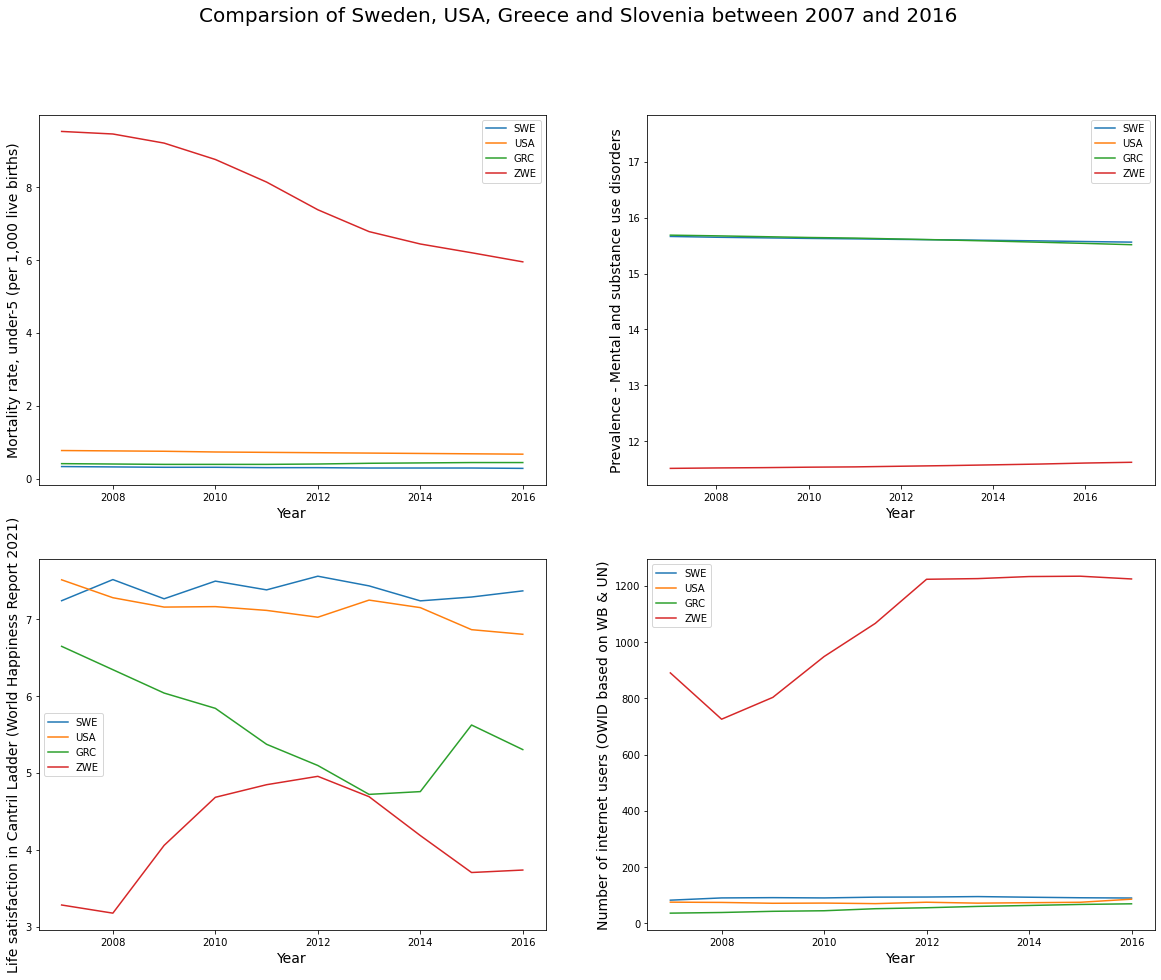

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

# SWEDEN

ax[0][0].plot(child_mortality_SWE['Year'], child_mortality_SWE['Mortality rate, under-5 (per 1,000 live births)'])

ax[0][1].plot(mental_substance_disorder_SWE['Year'], 
           mental_substance_disorder_SWE['Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent)'])

ax[1][0].plot(happiness_SWE['Year'], happiness_SWE['Life satisfaction in Cantril Ladder (World Happiness Report 2021)'])

ax[1][1].plot(gdp_data_cap_SWE['Year'], internet_SWE['Individuals using the Internet (% of population)'])

# USA 

ax[0][0].plot(child_mortality_USA['Year'], child_mortality_USA['Mortality rate, under-5 (per 1,000 live births)'])

ax[0][1].plot(mental_substance_disorder_USA['Year'], 
           mental_substance_disorder_USA['Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent)'])

ax[1][0].plot(happiness_USA['Year'], happiness_USA['Life satisfaction in Cantril Ladder (World Happiness Report 2021)'])

ax[1][1].plot(gdp_data_cap_USA['Year'], internet_USA['Individuals using the Internet (% of population)'])

# GREECE

ax[0][0].plot(child_mortality_GRC['Year'], child_mortality_GRC['Mortality rate, under-5 (per 1,000 live births)'])

ax[0][1].plot(mental_substance_disorder_GRC['Year'], 
           mental_substance_disorder_GRC['Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent)'])

ax[1][0].plot(happiness_GRC['Year'], happiness_GRC['Life satisfaction in Cantril Ladder (World Happiness Report 2021)'])

ax[1][1].plot(gdp_data_cap_GRC['Year'], internet_GRC['Individuals using the Internet (% of population)'])

# Slovenia

ax[0][0].plot(child_mortality_ZWE['Year'], child_mortality_ZWE['Mortality rate, under-5 (per 1,000 live births)'])

ax[0][1].plot(mental_substance_disorder_ZWE['Year'], 
           mental_substance_disorder_ZWE['Prevalence - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Percent)'])

ax[1][0].plot(happiness_ZWE['Year'], happiness_ZWE['Life satisfaction in Cantril Ladder (World Happiness Report 2021)'])

ax[1][1].plot(gdp_data_cap_ZWE['Year'], gdp_data_cap_ZWE['GDP per capita (constant 2010 US$)'])


ax[0][0].set_ylabel('Mortality rate, under-5 (per 1,000 live births)', fontsize=14)
ax[0][0].set_xlabel('Year', fontsize=14)


ax[0][1].set_ylabel('Prevalence - Mental and substance use disorders', fontsize=14)
ax[0][1].set_xlabel('Year', fontsize=14)

ax[1][0].set_ylabel('Life satisfaction in Cantril Ladder (World Happiness Report 2021)', fontsize=14)
ax[1][0].set_xlabel('Year', fontsize=14)


ax[1][1].set_ylabel('Number of internet users (OWID based on WB & UN)', fontsize=14)
ax[1][1].set_xlabel('Year', fontsize=14)

ax[0][0].legend(["SWE", "USA", "GRC", "ZWE"])
ax[0][1].legend(["SWE", "USA", "GRC", "ZWE"])
ax[1][0].legend(["SWE", "USA", "GRC", "ZWE"])
ax[1][1].legend(["SWE", "USA", "GRC", "ZWE"])

fig.suptitle("Comparsion of Sweden, USA, Greece and Slovenia between 2007 and 2016", fontsize=20)

plt.show()

## 2. b)

#### Discuss any observations that you make, or insights obtained, from the data visualisations. [2p]

My inital idea was to compare 4 different countries well being with the rise of the internet. In other words did internet usage increase our well being or does it makes us feel worse. 
I Choosed to use 3 different sources as a measure of well being: Mortality rate, Mental health and Life satisfaction and then wanted to compare this with the increase of daily internet users.
The problem was that for Sweden, USA, and Greece the internet usage has been prety stable between 2007 and 2016 and therefore I couldn't get any useful information...
The only thing that one could note is that as the increase of daily users in Slovenia increased the mortality rate decreased. 